<a href="https://colab.research.google.com/github/vargassalas/tp2-Deep_Learning/blob/main/Lab2_report_BROCHADO_%26_VARGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Image Classification

### Students
- Rodrigo BROCHADO
- Veronica VARGAS

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.

If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.  


## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set hyperparameters in order to obtain the best accuracy on the test set!


The following command sets the backend of matplotlib to the 'inline' backend so that the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it:

In [ ]:
%matplotlib inline

In [ ]:
student = True

if student:
    from google.colab import drive
    drive.mount('/content/gdrive')

    PATH = '/content/gdrive/My Drive/'#Telecom_Paris-Ecole/3A/1-Image_mining/Lab_2-Deep_learning'
    MODEL1_PATH = '/MODEL/model1.pt'
    MODEL2_PATH = '/MODEL/model2.pt'
    MODEL3_PATH = '/MODEL/model3.pt'
    MODEL4_PATH = '/MODEL/model4.pt'
    VALUES_PATH = '/VALUES'

Mounted at /content/gdrive


### Plotting functions and useful imports

You can skip this part

In [ ]:
# Python 2/3 compatibility
from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44], [10, 190, 200],[150, 50, 44], [250, 160, 100], [35, 80, 200]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploit its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Automatic differentiation
5. PyTorch and GPU (CUDA support)


### 1. Install PyTorch and Torchvision



In [ ]:
import numpy as np
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th

In [ ]:
# Create tensor of ones (FloatTensor by default)
ones = th.ones(3, 2)
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

#### Tensor Shape
To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [ ]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(ones.size()))

Tensor Shape: torch.Size([3, 2])


#### Reshape tensors

To reshape tensors (e.g. flatten a 3D tensor to a 1D array), you can use the `.view()` method:

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

[WARNING] when precising a new shape, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [ ]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = th.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.size())

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.size())


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.size())

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Matrix shape: torch.Size([3, 4])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [ ]:
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

PyTorch tensors also supports numpy indexing:

In [ ]:
print("\n Indexing Demo:")
print(ones[:, 1])


 Indexing Demo:
tensor([1., 1., 1.])


### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy <-> PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function  
(here `th.from_numpy()` because we renamed *torch* as *th*)

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [ ]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is passed by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])
Numpy Matrix:
[[1. 1.]
 [1. 1.]]


### 4. Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [ ]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = th.ones(2,2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [ ]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = th.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

tensor([7.], grad_fn=<AddBackward0>)


Let's backprop!

In [ ]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [ ]:
x.grad

tensor([2.])

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### 5. PyTorch and GPU (CUDA support)

Google colab provides a CUDA enabled GPU, so we are going to use its power. 
You can move tensor to the GPU by simply using the `to()` method.
Otherwise, PyTorch will use the CPU.

Here, we will demonstrate the usefulness of the GPU on a simple matrix multiplication:

In [ ]:
if th.cuda.is_available():
  # Create tensors
  x = th.ones(1000, 1000)
  y = 2 * x + 3
  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_cpu = time.time() - start_time
  
  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = x.to("cuda")
  y = y.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_gpu = time.time() - start_time
  
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.06041s 	 Time on GPU: 0.00709s
Speed up: Computation was 9X faster on GPU!


As expected, matrix multiplication is way faster on a GPU, so we'd better use it.

**Comments on part I:** 

We have seen that the syntax of PyTorch is very similar to that of NumPy, making it possible to do basic operations similarly. According to these benchmarks, PyTorch is a clear winner in deployment operations and crossing operations. One of the factors for faster operations in PyTorch could be due to faster access to the elements of the array.

However, PyTorch could sometimes be more computer heavy for the RAM and could require more memory to apply the models that could have been applied in NumPy.
  
Also, understanding how Autograd works and calculation graphics makes life easier by avoiding long calculations and instead of giving us an automation tool.


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10 Dataset

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [ ]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")


### Define subset of the dataset (so it is faster to train)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 40000 # Max: 50 000 - n_val_samples
n_val_samples = 10000


train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
#test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))  # we can use it to test on a subset
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [ ]:
num_workers = 5
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



     horse        cat        cat      horse


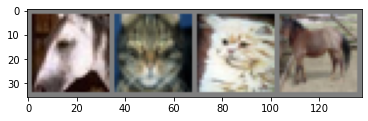

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [ ]:
# Useful imports
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling operation,
one fully connected layer and an output layer

In [ ]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

#### Linear Classifier

In [ ]:
class LinearClassifier(nn.Module):
    """
    Linear Classifier
    """
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten input 3x32x32 -> 3072
        x = x.view(x.size(0), -1)
        return self.linear(x)

### 3. Define a loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionally, SGD with momentum). You can read more about  [optimization methods](https://pytorch.org/docs/stable/optim.html).



In [ ]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

**Comment:**
*   *Cross entropy* is a good cost function when one workes on classification tasks. Also, it is very intuitive to work with entropy (information content) when handling probabilities.
*   By using the *Adam algorithm* we benefit from the inertia and optimization of the learning rate by taking into account the average of the points to have a more stable response.

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, feed the inputs to the network, and optimize



#### Data loader

In [ ]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batch size for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~10s per epoch with batch_size = 32

In [ ]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [ ]:
net = SimpleConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.38s
Epoch 1, 20% 	 train_loss: 1.68 took: 1.10s
Epoch 1, 30% 	 train_loss: 1.55 took: 1.06s
Epoch 1, 40% 	 train_loss: 1.49 took: 1.10s
Epoch 1, 50% 	 train_loss: 1.45 took: 1.08s
Epoch 1, 60% 	 train_loss: 1.41 took: 1.08s
Epoch 1, 70% 	 train_loss: 1.33 took: 1.13s
Epoch 1, 80% 	 train_loss: 1.38 took: 1.14s
Epoch 1, 90% 	 train_loss: 1.34 took: 1.08s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.25 took: 1.27s
Epoch 2, 20% 	 train_loss: 1.23 took: 1.08s
Epoch 2, 30% 	 train_loss: 1.23 took: 1.08s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.08s
Epoch 2, 50% 	 train_loss: 1.20 took: 1.09s
Epoch 2, 60% 	 train_loss: 1.17 took: 1.13s
Epoch 2, 70% 	 train_loss: 1.19 took: 1.09s
Epoch 2, 80% 	 train_loss: 1.18 took: 1.11s
Epoch 2, 90% 	 train_loss: 1.17 took: 1.09s
Validation loss = 1.19
Epoch 3, 10% 	 train_loss: 1.10 took: 1.24s
Epoch 3, 20% 	 train_loss: 1.09 took: 1.0

Now, let's look at the evolution of the losses

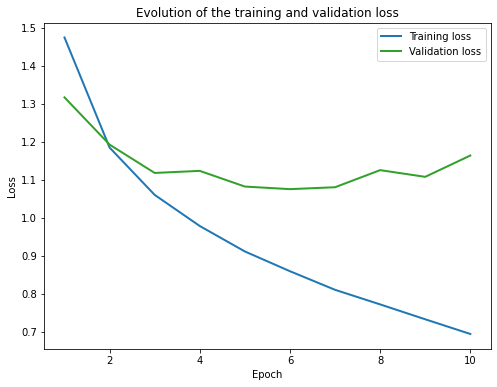

In [ ]:
plot_losses(train_history, val_history)

**Comment:** 

We see that at least from Epoch 6 onwards the validation curve begins to rise. This means that from that point it is very likely that there is an overlap of data in training. To avoid this, we could stop at epoch 6.  

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Ground truth:

       cat       ship       ship      plane


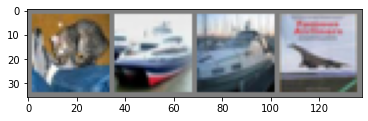

In [ ]:
try:
  images, labels = next(iter(test_loader))
except EOFError:
  pass

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images.to(device))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is from that particular class.
So, let's get the index of the highest energy:



Predicted:

       cat       ship       ship       ship


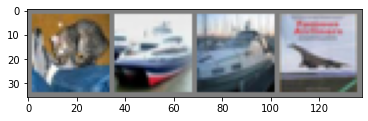

In [ ]:
_, predicted = torch.max(outputs, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [ ]:
def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
#print("Computing accuracy...")
#compute_accuracy(net)

That initial 63.78 % on the test set of images looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieves around 30% accuracy.

What are the classes that performed well, and the classes that did not perform well?



In [ ]:
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        69.60   
car          69.30   
bird         48.70   
cat          50.20   
deer         53.60   
dog          56.40   
frog         74.50   
horse        69.10   
ship         76.40   
truck        63.30   


### Confusion Matrix

Let's look at what type of error our networks makes... 
It seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs.
Also, it classifies a lot of trucks as cars.

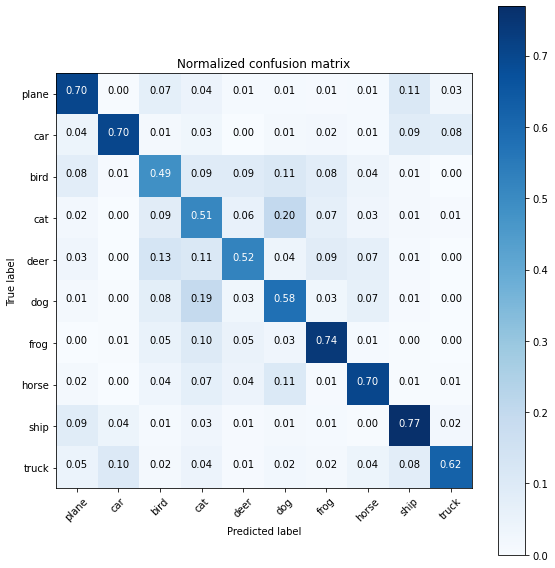

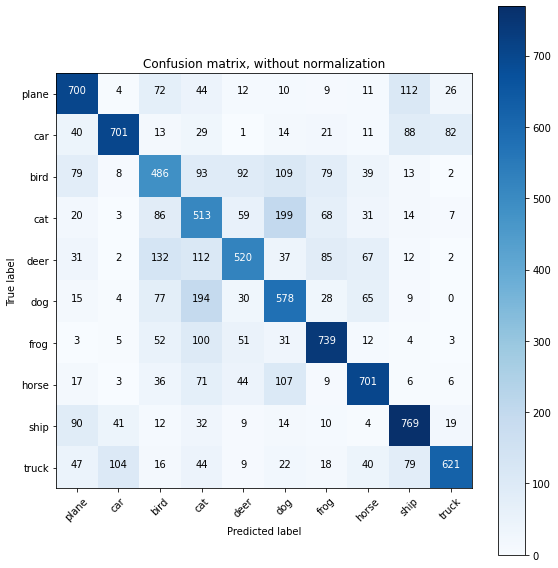

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

**Comment:**

An acceptable classification is shown in all but three classes: birds, cats and dogs.


# III. Exploring CNN Architectures

Now, it is your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and set hyperparameters in order to obtain the best accuracy on the **test** set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start changing the batch_size, number of epochs and then try adding more convolutional layers.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the element-wise ReLU of Z1 (which can be of any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected (fc) layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ are:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [ ]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example of use of helper method get_output_size() 

Let's assume you have an *input volume of size 3x32x32* (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

**get_output_size()** function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, *the output volume is 18x14x14*

In [ ]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


## Proposed architectures

For the creation of the different CNNs we use the example given in section II. We use the same loss function (Cross Entropy) and optimizer (Adam).

Our experiments consist of testing 4 different architectures in which we change:
* The number of convolutional layers
* The regularization

For each architecture proposed, we test 27 different hyperparameter configurations for the training, using the following hyperparameters:
* Batch size : {32, 64, 128}
* Epochs: {10, 20, 50}
* Learning rate: {0.0001, 0.001, 0.01}

### CNN configurations

#### 1. CNN with 2 convolutional layers.

In [ ]:
class MyConvolutionalNetwork1(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork1, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Size of the output of the last convolution:
        self.flattened_size = 64 * 8 * 8
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 32x32x32
        x = F.relu(self.conv1(x))
        # 32x32x32 -> 32x16x16
        x = self.pool1(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...

         # shape : 32x16x16 -> 64x16x16
        x = F.relu(self.conv2(x))
        # 64x16x16 -> 64x8x8
        x = self.pool2(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 64x8x8 -> 4096
        x = x.view(-1, self.flattened_size)
        # 4096 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

#### 2. CNN with 3 convolutional layers.

In [ ]:
class MyConvolutionalNetwork2(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Size of the output of the last convolution:
        self.flattened_size = 128 * 4 * 4
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 32x32x32
        x = F.relu(self.conv1(x))
        # 32x32x32 -> 32x16x16
        x = self.pool1(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...

        # shape : 32x16x16 -> 64x16x16
        x = F.relu(self.conv2(x))
        # 64x16x16 -> 64x8x8
        x = self.pool2(x)

        # shape : 64x8x8 -> 128x8x8
        x = F.relu(self.conv3(x))
        # 128x8x8 -> 128x4x4
        x = self.pool3(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 128x4x4 -> 2048
        x = x.view(-1, self.flattened_size)
        # 2048 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

#### 3. CNN with 4 convolutional layers.

In [ ]:
class MyConvolutionalNetwork3(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork3, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Size of the output of the last convolution:
        self.flattened_size = 256 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 32x32x32
        x = F.relu(self.conv1(x))
        # 32x32x32 -> 32x16x16
        x = self.pool1(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...

        # shape : 32x16x16 -> 64x16x16
        x = F.relu(self.conv2(x))
        # 64x16x16 -> 64x8x8
        x = self.pool2(x)

        # shape : 64x8x8 -> 128x8x8
        x = F.relu(self.conv3(x))
        # 128x8x8 -> 128x4x4
        x = self.pool3(x)

        # shape : 128x4x4 -> 256x4x4
        x = F.relu(self.conv4(x))
        # 256x4x4 -> 256x2x2
        x = self.pool4(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 256x2x2 -> 1024
        x = x.view(-1, self.flattened_size)
        # 1024 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

#### 4. CNN with 4 convolutional layers + Batch normalization.

In [ ]:
class MyConvolutionalNetwork4(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork4, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Size of the output of the last convolution:
        self.flattened_size = 256 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 32x32x32
        x = F.relu(self.bn1(self.conv1(x)))
        # 32x32x32 -> 32x16x16
        x = self.pool1(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...

        # shape : 32x16x16 -> 64x16x16
        x = F.relu(self.bn2(self.conv2(x)))
        # 64x16x16 -> 64x8x8
        x = self.pool2(x)

        # shape : 64x8x8 -> 128x8x8
        x = F.relu(self.bn3(self.conv3(x)))
        # 128x8x8 -> 128x4x4
        x = self.pool3(x)

        # shape : 128x4x4 -> 256x4x4
        x = F.relu(self.bn4(self.conv4(x)))
        # 256x4x4 -> 256x2x2
        x = self.pool4(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 256x2x2 -> 1024
        x = x.view(-1, self.flattened_size)
        # 1024 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

#### Usefull fonctions

Modifiying to have a new plot of Loss

In [ ]:
def plot_losses_N(train_history_list, val_history_list):
  id = 0
  nb_lr = 3
  bs = [32,64,128]
  ne = [10,20,50]
  lr = [0.01, 0.001, 0.0001]
  fig, axs = plt.subplots(3,3, figsize=(15,15))
  fig.suptitle("Evolution of the training and validation loss")

  for i in range(9):
    row = int(i/3)
    col = int(i%3)
    
    for k in range(nb_lr):
      train_history = train_history_list[id]
      val_history = val_history_list[id]
      x = np.arange(1, len(train_history) + 1)

      label1 = "Train " + str(k+1)
      label2 = "Valid " + str(k+1)
      axs[row, col].plot(x, train_history, color=colors[k*2], label=label1 , linewidth=1, linestyle='-')
      axs[row, col].plot(x, val_history, color=colors[k*2+1], label=label2, linewidth=1)
      axs[row, col].legend(loc='upper right')
      id = id + 1
    tit = 'BatchS: '+str(bs[row])+' - NEpochs:'+str(ne[col])
    axs[row, col].set_title(tit)
  
  for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')


We modified one of the functions to obtain the direct values of the accuracy:

In [ ]:
def dataset_accuracy_val(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    return [total, accuracy]

def printAccuracy(values, name=""):
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(values[0], name, values[1]))

def train_set_accuracy(net):
    values = dataset_accuracy_val(net, train_loader, )
    printAccuracy(values, "train")
    return values

def val_set_accuracy(net):
    values = dataset_accuracy_val(net, val_loader)
    printAccuracy(values, "validation")
    return values  
    
def test_set_accuracy(net):
    values = dataset_accuracy_val(net, test_loader)
    printAccuracy(values, "test")
    return values

def compute_accuracy(net):
    train_val = train_set_accuracy(net)
    valid_val = val_set_accuracy(net)
    test_val  = test_set_accuracy(net)
    return [train_val[1], valid_val[1], test_val[1]]


## Experiments with architecture 1

### Train models

In [ ]:
train_history1 = []
val_history1 = []
hyper_param1 = []
acc_list1 = []
best_net1 = None
best_acc1 = 0
best_results1 = None
loop_start_time = time.time()

for bs in [32,64,128]:
    for ne in [10,20,50]:
        for lr in [0.01, 0.001, 0.0001]:
            net = MyConvolutionalNetwork1()
            t_hist, v_hist = train(net, batch_size=bs, n_epochs=ne, learning_rate=lr)
            hyper_param1.append([ne, bs, lr])
            train_history1.append(t_hist)
            val_history1.append(v_hist)
            acc_value = compute_accuracy(net)
            acc_list1.append(acc_value)
            # Only based on the accuracy of the test 
            if acc_value[2] >= best_acc1:
                best_acc1 = acc_value[2]
                best_net1 = net
                best_results1 = [[ne, bs, lr], t_hist, v_hist, acc_value]

print("Loop Finished, took {:.2f}s".format(time.time() - loop_start_time))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 47, 90% 	 train_loss: 0.34 took: 1.19s
Validation loss = 1.06
Epoch 48, 10% 	 train_loss: 0.30 took: 1.35s
Epoch 48, 20% 	 train_loss: 0.29 took: 1.17s
Epoch 48, 30% 	 train_loss: 0.31 took: 1.15s
Epoch 48, 40% 	 train_loss: 0.33 took: 1.16s
Epoch 48, 50% 	 train_loss: 0.32 took: 1.14s
Epoch 48, 60% 	 train_loss: 0.31 took: 1.15s
Epoch 48, 70% 	 train_loss: 0.34 took: 1.16s
Epoch 48, 80% 	 train_loss: 0.34 took: 1.15s
Epoch 48, 90% 	 train_loss: 0.33 took: 1.18s
Validation loss = 1.08
Epoch 49, 10% 	 train_loss: 0.28 took: 1.37s
Epoch 49, 20% 	 train_loss: 0.28 took: 1.16s
Epoch 49, 30% 	 train_loss: 0.32 took: 1.17s
Epoch 49, 40% 	 train_loss: 0.30 took: 1.17s
Epoch 49, 50% 	 train_loss: 0.31 took: 1.15s
Epoch 49, 60% 	 train_loss: 0.30 took: 1.18s
Epoch 49, 70% 	 train_loss: 0.31 took: 1.15s
Epoch 49, 80% 	 train_loss: 0.32 took: 1.15s
Epoch 49, 90% 	 train_loss: 0.35 took: 1.19s
Validation loss = 1.0

Saving the weights of the best model

In [ ]:
saveModel = student & True
loadModel = student & False

if saveModel:
    # Saving model
    torch.save({
              'train_history1': train_history1,
              'val_history1': val_history1,
              'hyper_param1': hyper_param1,
              'acc_list1': acc_list1,
              'best_net1': best_net1,
              'best_acc1': best_acc1,
              'best_results1': best_results1,
              'model_state_dict': best_net1.state_dict(),
              }, PATH+MODEL1_PATH) 
    
if loadModel:
    best_net1 = MyConvolutionalNetwork1()

    checkpoint = torch.load(MODEL1_PATH)
    best_net1.load_state_dict(checkpoint['model_state_dict'])
    # Other values
    train_history1 = [checkpoint['train_history1']]
    val_history1 = [checkpoint['val_history1']]
    hyper_param1 = [checkpoint['hyper_param1']]
    acc_list1 = [checkpoint['acc_list1']]
    best_net1 = [checkpoint['best_net1']]
    best_acc1 = [checkpoint['best_acc1']]
    best_results1 = [checkpoint['best_results1']]

    #best_net1.eval()
    best_net1.train()


### Accuracy of the trained models

In [ ]:
for k in range(len(hyper_param1)):
    ne, bs, lr = hyper_param1[k]
    tr_acc, val_acc, te_acc = acc_list1[k]

    if te_acc == best_acc1:
        print('*'*30)
    print('{} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(40000, 'train', tr_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'validation', val_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'test', te_acc))
    if te_acc == best_acc1:
        print('*'*30)
    print('')
    print('-'*30)
    print('')

10 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 57.49 %
	Accuracy of the network on the 10000 validation images: 53.60 %
	Accuracy of the network on the 10000 test images: 53.62 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the 40000 train images: 80.56 %
	Accuracy of the network on the 10000 validation images: 71.09 %
	Accuracy of the network on the 10000 test images: 70.56 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.0001
	Accuracy of the network on the 40000 train images: 67.67 %
	Accuracy of the network on the 10000 validation images: 63.68 %
	Accuracy of the network on the 10000 test images: 64.19 %

------------------------------

20 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 57.84 %
	Accuracy of the network on the 10000 validation images: 51.64 %
	Accuracy of the network 

### Plot of 27 configurations

Here we make a plot of the 27 cases tested with the different hyperparameters.

The diagrams below represent the evolution of training and validation loss. Each image represents a different batch size and number of Epochs configuration. The curve's number represents a different learning rate, there are three sets of data where:
- Train and Valid 1: learning rate = 0.01
- Train and Valid 2: learning rate = 0.001
- Train and Valid 3: learning rate = 0.0001

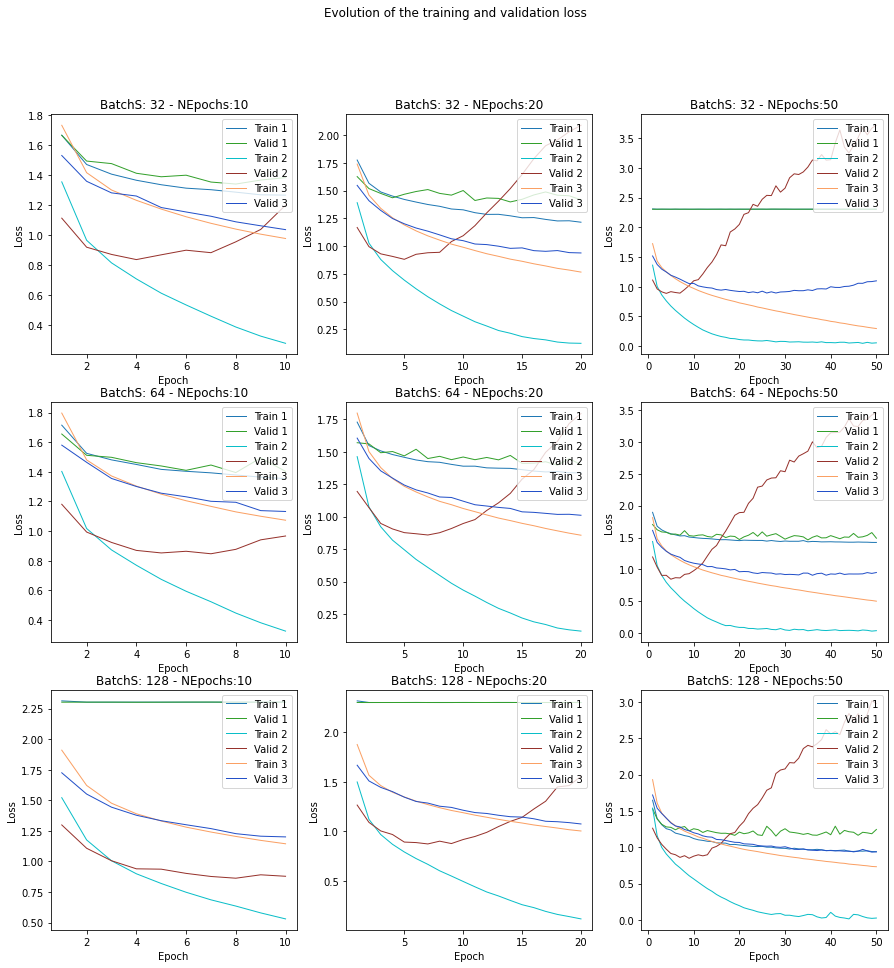

In [ ]:
plot_losses_N(train_history1, val_history1)

**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

### Best Results for architecture 1

In [ ]:
ne, bs, lr = best_results1[0]
tr_acc, val_acc, te_acc = best_results1[3]

print('Best params: {} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('train', 40000, tr_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('validation', 10000, val_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('test', 10000, te_acc))

Best params: 10 epochs, batch size = 64, learning rate = 0.001
	Accuracy of the network on the train 40000 images: 86.54 %
	Accuracy of the network on the validation 10000 images: 72.03 %
	Accuracy of the network on the test 10000 images: 71.25 %


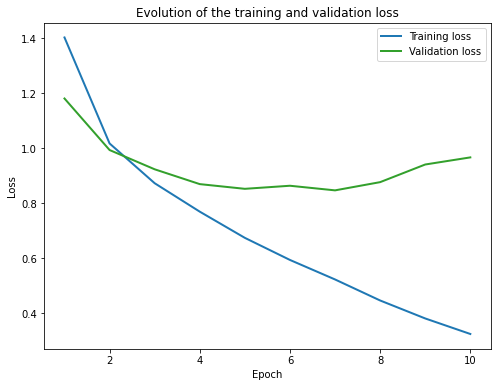

In [ ]:
plot_losses(best_results1[1], best_results1[2])

In [ ]:
confusion_matrix1 = accuracy_per_class(best_net1)

Class      Accuracy (%)
plane        77.60   
car          82.50   
bird         62.40   
cat          57.10   
deer         63.00   
dog          54.10   
frog         79.60   
horse        75.70   
ship         77.00   
truck        83.50   


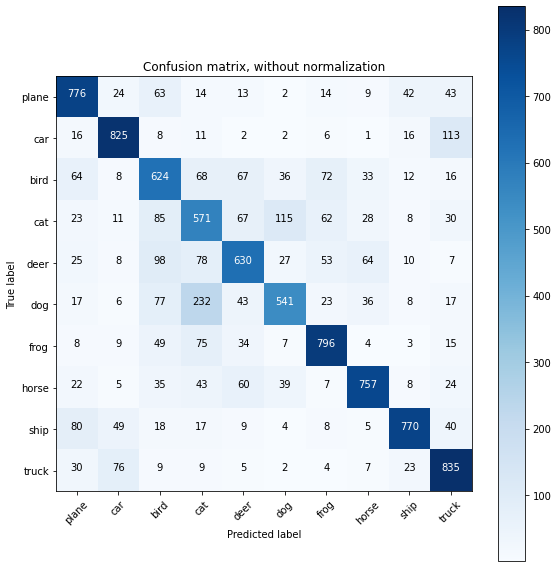

In [ ]:
plot_confusion_matrix(confusion_matrix1, classes,
                      title='Confusion matrix, without normalization')

**Comments on architecture 1**

In this architecture, we use an additional convolutional layer to the proposed example, composed of 32 filters. We also include a MAX pooling layer.
According to our results, the hyperparameters that give us the best results are 10 epochs, batch size = 64, and learning rat = 0.001. 

The accuracy of the test set was 71.25%, which is improvement with respect to the example in Section II. This result was expected because by increasing the number of convolutional layers we allow the CNN structure to identify more complex patterns in the images.

Also, It can be seen that the accuracy of the classes has improved with fewer misclassified images.

## Experiments with architecture 2

### Train models

In [ ]:
train_history2 = []
val_history2 = []
hyper_param2 = []
acc_list2 = []
best_net2 = None
best_acc2 = 0
best_results2 = None
loop_start_time = time.time()

for bs in [32,64,128]:
    for ne in [10,20,50]:
        for lr in [0.01, 0.001, 0.0001]:
            net = MyConvolutionalNetwork2()
            t_hist, v_hist = train(net, batch_size=bs, n_epochs=ne, learning_rate=lr)
            hyper_param2.append([ne, bs, lr])
            train_history2.append(t_hist)
            val_history2.append(v_hist)
            acc_value = compute_accuracy(net)
            acc_list2.append(acc_value)
            if acc_value[2] >= best_acc2:
                best_acc2 = acc_value[2]
                best_net2 = net
                best_results2 = [[ne, bs, lr], t_hist, v_hist, acc_value]

print("Loop Finished, took {:.2f}s".format(time.time() - loop_start_time))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 47, 90% 	 train_loss: 0.25 took: 1.31s
Validation loss = 0.99
Epoch 48, 10% 	 train_loss: 0.21 took: 1.56s
Epoch 48, 20% 	 train_loss: 0.22 took: 1.33s
Epoch 48, 30% 	 train_loss: 0.24 took: 1.31s
Epoch 48, 40% 	 train_loss: 0.21 took: 1.32s
Epoch 48, 50% 	 train_loss: 0.23 took: 1.29s
Epoch 48, 60% 	 train_loss: 0.21 took: 1.28s
Epoch 48, 70% 	 train_loss: 0.25 took: 1.28s
Epoch 48, 80% 	 train_loss: 0.24 took: 1.31s
Epoch 48, 90% 	 train_loss: 0.22 took: 1.29s
Validation loss = 1.03
Epoch 49, 10% 	 train_loss: 0.19 took: 1.53s
Epoch 49, 20% 	 train_loss: 0.19 took: 1.30s
Epoch 49, 30% 	 train_loss: 0.20 took: 1.30s
Epoch 49, 40% 	 train_loss: 0.21 took: 1.30s
Epoch 49, 50% 	 train_loss: 0.23 took: 1.29s
Epoch 49, 60% 	 train_loss: 0.23 took: 1.29s
Epoch 49, 70% 	 train_loss: 0.24 took: 1.28s
Epoch 49, 80% 	 train_loss: 0.23 took: 1.32s
Epoch 49, 90% 	 train_loss: 0.22 took: 1.30s
Validation loss = 1.0

In [ ]:
saveModel = student & True
loadModel = student & False

if saveModel:
    # Saving model
    torch.save({
              'train_history2': train_history2,
              'val_history2': val_history2,
              'hyper_param2': hyper_param2,
              'acc_list2': acc_list2,
              'best_net2': best_net2,
              'best_acc2': best_acc2,
              'best_results2': best_results2,
              'model_state_dict': best_net2.state_dict(),
              }, PATH+MODEL2_PATH) 
    
if loadModel:
    best_net2 = MyConvolutionalNetwork2()

    checkpoint = torch.load(PATH+MODEL2_PATH)
    best_net2.load_state_dict(checkpoint['model_state_dict'])
    # Other values
    train_history2 = [checkpoint['train_history2']]
    val_history2 = [checkpoint['val_history2']]
    hyper_param2 = [checkpoint['hyper_param2']]
    acc_list2 = [checkpoint['acc_list2']]
    best_net2 = [checkpoint['best_net2']]
    best_acc2 = [checkpoint['best_acc2']]
    best_results2 = [checkpoint['best_results2']]

    #best_net2.eval()
    #best_net2.train()

### Accuracy of the trained models

In [ ]:
for k in range(len(hyper_param2)):
    ne, bs, lr = hyper_param2[k]
    tr_acc, val_acc, te_acc = acc_list2[k]

    if te_acc == best_acc2:
        print('*'*30)
    print('{} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(40000, 'train', tr_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'validation', val_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'test', te_acc))
    if te_acc == best_acc2:
        print('*'*30)
    print('')
    print('-'*30)
    print('')


10 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 45.27 %
	Accuracy of the network on the 10000 validation images: 44.27 %
	Accuracy of the network on the 10000 test images: 44.18 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the 40000 train images: 84.29 %
	Accuracy of the network on the 10000 validation images: 74.67 %
	Accuracy of the network on the 10000 test images: 73.65 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.0001
	Accuracy of the network on the 40000 train images: 66.17 %
	Accuracy of the network on the 10000 validation images: 63.36 %
	Accuracy of the network on the 10000 test images: 62.92 %

------------------------------

20 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 9.94 %
	Accuracy of the network on the 10000 validation images: 10.25 %
	Accuracy of the network o

**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

### Plot of 27 configurations

Here we make a plot of the 27 cases tested with the different hyperparameters.

The diagrams below represent the evolution of training and validation loss. Each image represents a different batch size and number of Epochs configuration. The curve's number represents a different learning rate, there are three sets of data where:

- Train and Valid 1: learning rate = 0.01
- Train and Valid 2: learning rate = 0.001
- Train and Valid 3: learning rate = 0.0001



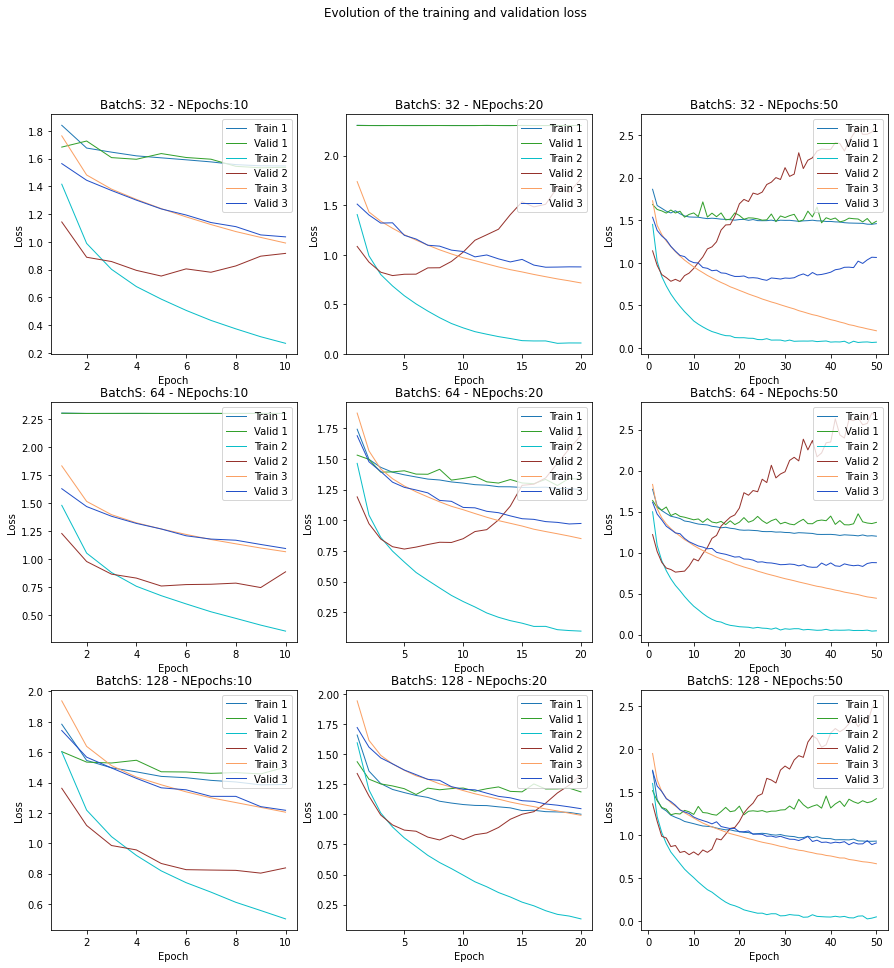

In [ ]:
plot_losses_N(train_history2, val_history2)

### Best Results for architecture 2

In [ ]:
ne, bs, lr = best_results2[0]
tr_acc, val_acc, te_acc = best_results2[3]

print('Best params: {} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('train', 40000, tr_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('validation', 10000, val_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('test', 10000, te_acc))


Best params: 10 epochs, batch size = 64, learning rate = 0.001
	Accuracy of the network on the train 40000 images: 89.80 %
	Accuracy of the network on the validation 10000 images: 75.90 %
	Accuracy of the network on the test 10000 images: 74.87 %


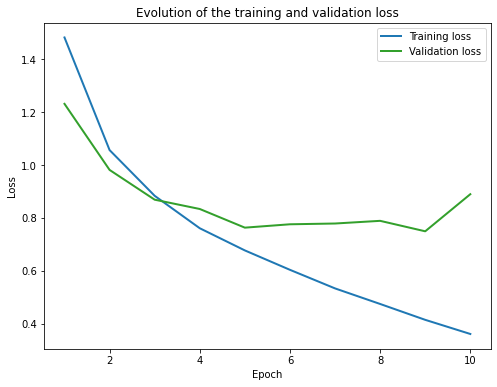

In [ ]:
plot_losses(best_results2[1], best_results2[2])

In [ ]:
confusion_matrix2 = accuracy_per_class(best_net2)

Class      Accuracy (%)
plane        78.60   
car          86.80   
bird         62.40   
cat          53.70   
deer         69.20   
dog          63.50   
frog         84.30   
horse        83.30   
ship         84.80   
truck        82.10   


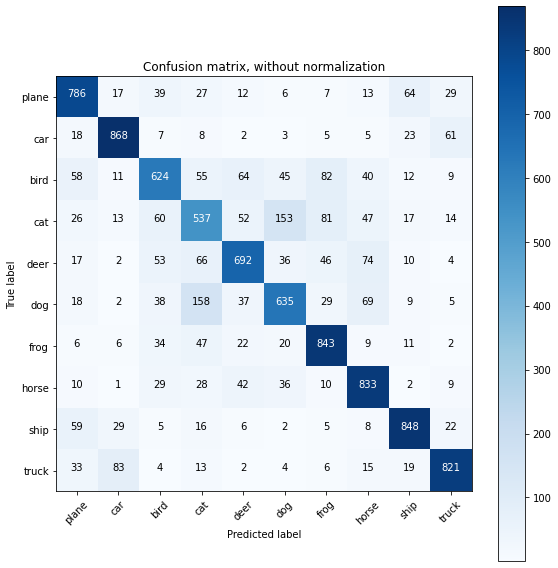

In [ ]:
plot_confusion_matrix(confusion_matrix2, classes,
                      title='Confusion matrix, without normalization')

**Comments on architecture 2**

In this architecture, we use 3 convolutional blocks, consisting of a convolution with kernel 3x3 and MAX pooling. The best hyperparameter configuration was found to be 10 epochs, batch size = 64, and learning rate = 0.001, the same as the ones obtained for the previous architecture. Despite that, the addition of another convolutional layer improved the results obtained, as we can see by the results presented. We were able to achieve higher accuracy for the test data (74.87% instead of 71.25%) and lower loss values. As before, the improvement can be attributed to the fact that a deeper network allowed for better feature extraction of the images

## Experiments with architecture 3

### Train models

In [ ]:
train_history3 = []
val_history3 = []
hyper_param3 = []
acc_list3 = []
best_net3 = None
best_acc3 = 0
best_results3 = None
loop_start_time = time.time()

for bs in [32,64,128]:
    for ne in [10,20,50]:
        for lr in [0.01, 0.001, 0.0001]:
            net = MyConvolutionalNetwork3()
            t_hist, v_hist = train(net, batch_size=bs, n_epochs=ne, learning_rate=lr)
            hyper_param3.append([ne, bs, lr])
            train_history3.append(t_hist)
            val_history3.append(v_hist)
            acc_value = compute_accuracy(net)
            acc_list3.append(acc_value)
            if acc_value[2] >= best_acc3:
                best_acc3 = acc_value[2]
                best_net3 = net
                best_results3 = [[ne, bs, lr], t_hist, v_hist, acc_value]

print("Loop Finished, took {:.2f}s".format(time.time() - loop_start_time))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 47, 90% 	 train_loss: 0.04 took: 1.34s
Validation loss = 1.82
Epoch 48, 10% 	 train_loss: 0.03 took: 1.55s
Epoch 48, 20% 	 train_loss: 0.03 took: 1.35s
Epoch 48, 30% 	 train_loss: 0.03 took: 1.35s
Epoch 48, 40% 	 train_loss: 0.02 took: 1.38s
Epoch 48, 50% 	 train_loss: 0.02 took: 1.37s
Epoch 48, 60% 	 train_loss: 0.01 took: 1.36s
Epoch 48, 70% 	 train_loss: 0.03 took: 1.34s
Epoch 48, 80% 	 train_loss: 0.10 took: 1.36s
Epoch 48, 90% 	 train_loss: 0.09 took: 1.36s
Validation loss = 1.85
Epoch 49, 10% 	 train_loss: 0.04 took: 1.52s
Epoch 49, 20% 	 train_loss: 0.02 took: 1.36s
Epoch 49, 30% 	 train_loss: 0.02 took: 1.35s
Epoch 49, 40% 	 train_loss: 0.01 took: 1.37s
Epoch 49, 50% 	 train_loss: 0.02 took: 1.34s
Epoch 49, 60% 	 train_loss: 0.04 took: 1.35s
Epoch 49, 70% 	 train_loss: 0.02 took: 1.34s
Epoch 49, 80% 	 train_loss: 0.02 took: 1.34s
Epoch 49, 90% 	 train_loss: 0.05 took: 1.34s
Validation loss = 1.8

In [ ]:
saveModel = student & True
loadModel = student & False

if saveModel:
    # Saving model
    torch.save({
              'train_history': train_history3,
              'val_history': val_history3,
              'hyper_param': hyper_param3,
              'acc_list': acc_list3,
              'best_net': best_net3,
              'best_acc': best_acc3,
              'best_results': best_results3,
              'model_state_dict': best_net3.state_dict(),
              #'optimizer_state_dict': optimizer.state_dict(),
              #'loss': criterion,
              }, PATH+MODEL3_PATH) 
    
if loadModel:
    best_net3 = MyConvolutionalNetwork3()
    #optimizer = optimizer

    checkpoint = torch.load(PATH+MODEL3_PATH)
    best_net3.load_state_dict(checkpoint['model_state_dict'])
    #optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    #criterion = checkpoint['loss']

    # Other values
    train_history3 = [checkpoint['train_history']]
    val_history3 = [checkpoint['val_history']]
    hyper_param = [checkpoint['hyper_param']]
    acc_list3 = [checkpoint['acc_list']]
    best_net3 = [checkpoint['best_net']]
    best_acc3 = [checkpoint['best_acc']]
    best_results3 = [checkpoint['best_results']]

    #best_net3.eval()
    #best_net3.train()

### Accuracy of the trained models

In [ ]:
for k in range(len(hyper_param3)):
    ne, bs, lr = hyper_param3[k]
    tr_acc, val_acc, te_acc = acc_list3[k]

    if te_acc == best_acc3:
        print('*'*30)
    print('{} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(40000, 'train', tr_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'validation', val_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'test', te_acc))
    if te_acc == best_acc3:
        print('*'*30)
    print('')
    print('-'*30)
    print('')

10 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 9.95 %
	Accuracy of the network on the 10000 validation images: 10.22 %
	Accuracy of the network on the 10000 test images: 10.00 %

------------------------------

******************************
10 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the 40000 train images: 90.86 %
	Accuracy of the network on the 10000 validation images: 76.22 %
	Accuracy of the network on the 10000 test images: 75.70 %
******************************

------------------------------

10 epochs, batch size = 32, learning rate = 0.0001
	Accuracy of the network on the 40000 train images: 69.31 %
	Accuracy of the network on the 10000 validation images: 65.26 %
	Accuracy of the network on the 10000 test images: 65.49 %

------------------------------

20 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 9.94 %
	Accuracy of the network on th

**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

### Plot of 27 configurations

Here we make a plot of the 27 cases tested with the different hyperparameters.

The diagrams below represent the evolution of training and validation loss. Each image represents a different batch size and number of Epochs configuration. The curve's number represents a different learning rate, there are three sets of data where:

- Train and Valid 1: learning rate = 0.01
- Train and Valid 2: learning rate = 0.001
- Train and Valid 3: learning rate = 0.0001

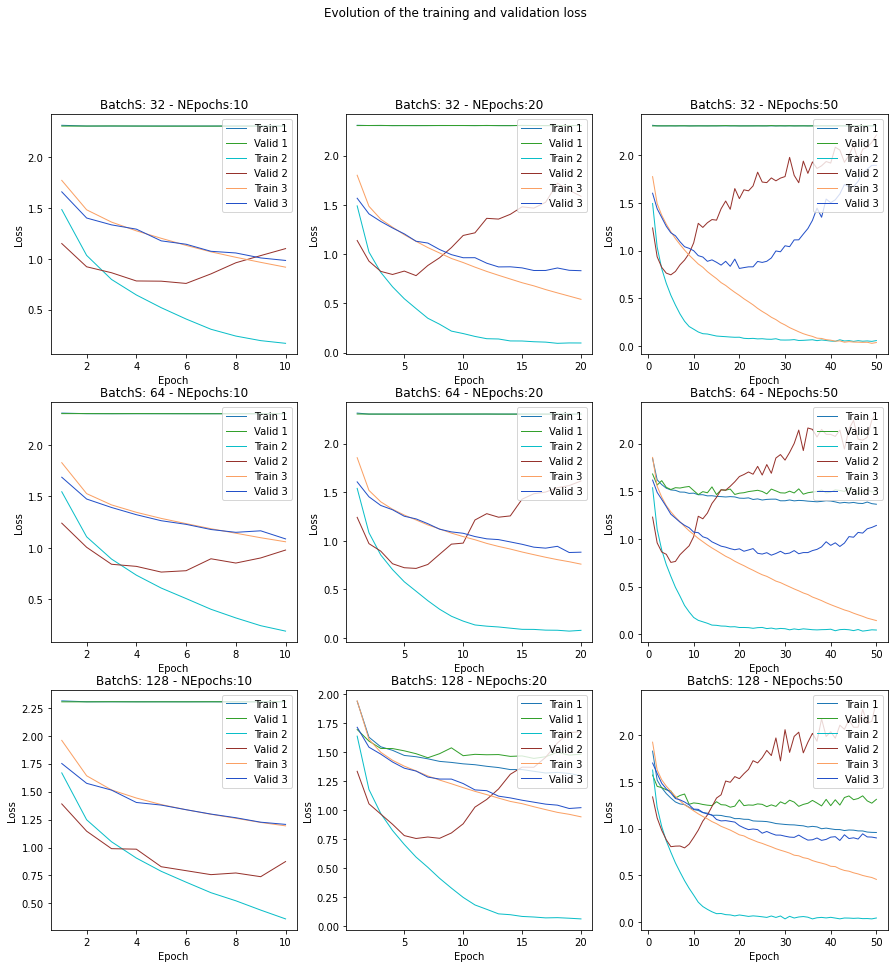

In [ ]:
plot_losses_N(train_history3, val_history3)

### Best Results for architecture 3

In [ ]:
ne, bs, lr = best_results3[0]
tr_acc, val_acc, te_acc = best_results3[3]

print('Best params: {} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('train', 40000, tr_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('validation', 10000, val_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('test', 10000, te_acc))

Best params: 10 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the train 40000 images: 90.86 %
	Accuracy of the network on the validation 10000 images: 76.22 %
	Accuracy of the network on the test 10000 images: 75.70 %


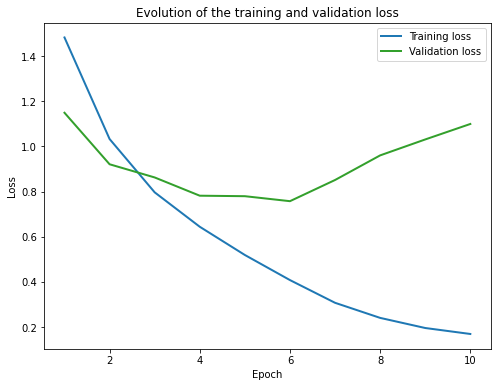

In [ ]:
plot_losses(best_results3[1], best_results3[2])

In [ ]:
confusion_matrix3 = accuracy_per_class(best_net3)

Class      Accuracy (%)
plane        82.80   
car          85.80   
bird         63.00   
cat          51.90   
deer         80.70   
dog          63.80   
frog         86.00   
horse        80.30   
ship         83.30   
truck        79.40   


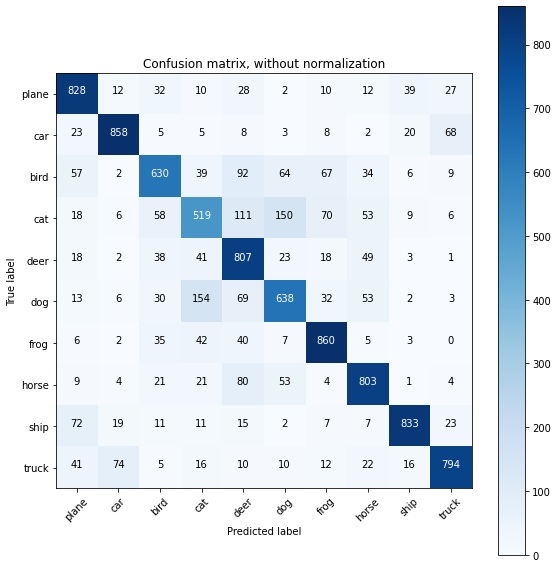

In [ ]:
plot_confusion_matrix(confusion_matrix3, classes,
                      title='Confusion matrix, without normalization')

**Comments on architecture 3:**

In this architecture, we use four convolutional blocks, consisting of a convolution with kernel 3x3 and MAX pooling. The best hyperparameter configuration found is 10 epochs, batch size = 32, and learning rate = 0.001. The best batch size was smaller than both other architectures, meaning that more iterations were required to finish an epoch and that the network's weights are updated more times per epoch. 

The effect of what can be seen by comparing the loss function for the best configuration in architectures 2 and 3. With more updates per epoch, the model in architecture 3 reaches its best values faster than the one in 2. The results for this architecture are better than the previous ones, obtaining a 75.7% accuracy on the test data. As before, the improvement can be attributed to the fact that a deeper network allowed for better feature extraction of the images.

## Experiments with architecture 4

### Train models

In [ ]:
train_history4 = []
val_history4 = []
hyper_param4 = []
acc_list4 = []
best_net4 = None
best_acc4 = 0
best_results4 = None
loop_start_time = time.time()

for bs in [32,64,128]:
    for ne in [10,20,50]:
        for lr in [0.01, 0.001, 0.0001]:
            net = MyConvolutionalNetwork4()
            t_hist, v_hist = train(net, batch_size=bs, n_epochs=ne, learning_rate=lr)
            hyper_param4.append([ne, bs, lr])
            train_history4.append(t_hist)
            val_history4.append(v_hist)
            acc_value = compute_accuracy(net)
            acc_list4.append(acc_value)
            if acc_value[2] >= best_acc4:
                best_acc4 = acc_value[2] 
                best_net4 = net
                best_results4 = [[ne, bs, lr], t_hist, v_hist, acc_value]

print("Loop Finished, took {:.2f}s".format(time.time() - loop_start_time))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 47, 90% 	 train_loss: 0.02 took: 1.58s
Validation loss = 1.67
Epoch 48, 10% 	 train_loss: 0.04 took: 1.76s
Epoch 48, 20% 	 train_loss: 0.03 took: 1.56s
Epoch 48, 30% 	 train_loss: 0.02 took: 1.56s
Epoch 48, 40% 	 train_loss: 0.02 took: 1.57s
Epoch 48, 50% 	 train_loss: 0.01 took: 1.55s
Epoch 48, 60% 	 train_loss: 0.03 took: 1.58s
Epoch 48, 70% 	 train_loss: 0.02 took: 1.55s
Epoch 48, 80% 	 train_loss: 0.02 took: 1.58s
Epoch 48, 90% 	 train_loss: 0.02 took: 1.57s
Validation loss = 1.59
Epoch 49, 10% 	 train_loss: 0.01 took: 1.77s
Epoch 49, 20% 	 train_loss: 0.02 took: 1.58s
Epoch 49, 30% 	 train_loss: 0.01 took: 1.58s
Epoch 49, 40% 	 train_loss: 0.02 took: 1.63s
Epoch 49, 50% 	 train_loss: 0.02 took: 1.59s
Epoch 49, 60% 	 train_loss: 0.01 took: 1.60s
Epoch 49, 70% 	 train_loss: 0.03 took: 1.60s
Epoch 49, 80% 	 train_loss: 0.02 took: 1.58s
Epoch 49, 90% 	 train_loss: 0.02 took: 1.58s
Validation loss = 1.6

In [ ]:
saveModel = student & True
loadModel = student & False

if saveModel:
    # Saving model
    torch.save({
              'train_history': train_history4,
              'val_history': val_history4,
              'hyper_param': hyper_param4,
              'acc_list': acc_list4,
              'best_net': best_net4,
              'best_acc': best_acc4,
              'best_results': best_results4,
              'model_state_dict': best_net4.state_dict(),
              #'optimizer_state_dict': optimizer.state_dict(),
              #'loss': criterion,
              }, PATH+MODEL4_PATH) 
    
if loadModel:
    best_net4 = MyConvolutionalNetwork4()
    #optimizer = optimizer

    checkpoint = torch.load(PATH+MODEL4_PATH)
    best_net4.load_state_dict(checkpoint['model_state_dict'])
    #optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    #criterion = checkpoint['loss']
    # Other values
    train_history4 = [checkpoint['train_history']]
    val_history4 = [checkpoint['val_history']]
    hyper_param = [checkpoint['hyper_param']]
    acc_list4 = [checkpoint['acc_list']]
    best_net4 = [checkpoint['best_net']]
    best_acc4 = [checkpoint['best_acc']]
    best_results4 = [checkpoint['best_results']]

    #best_net4.eval()
    #best_net4.train()

### Accuracy of the trained models

In [ ]:
for k in range(len(hyper_param4)):
    ne, bs, lr = hyper_param4[k]
    tr_acc, val_acc, te_acc = acc_list4[k]

    if te_acc == best_acc4:
        print('*'*30)
    print('{} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(40000, 'train', tr_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'validation', val_acc))
    print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format(10000, 'test', te_acc))
    if te_acc == best_acc4:
        print('*'*30)
    print('')
    print('-'*30)
    print('')

10 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 70.27 %
	Accuracy of the network on the 10000 validation images: 71.14 %
	Accuracy of the network on the 10000 test images: 63.93 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the 40000 train images: 90.67 %
	Accuracy of the network on the 10000 validation images: 80.26 %
	Accuracy of the network on the 10000 test images: 74.27 %

------------------------------

10 epochs, batch size = 32, learning rate = 0.0001
	Accuracy of the network on the 40000 train images: 80.73 %
	Accuracy of the network on the 10000 validation images: 74.51 %
	Accuracy of the network on the 10000 test images: 68.52 %

------------------------------

20 epochs, batch size = 32, learning rate = 0.01
	Accuracy of the network on the 40000 train images: 78.24 %
	Accuracy of the network on the 10000 validation images: 74.03 %
	Accuracy of the network 

**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

### Plot of 27 configurations

Here we make a plot of the 27 cases tested with the different hyperparameters.

The diagrams below represent the evolution of training and validation loss. Each image represents a different batch size and number of Epochs configuration. The curve's number represents a different learning rate, there are three sets of data where:

- Train and Valid 1: learning rate = 0.01
- Train and Valid 2: learning rate = 0.001
- Train and Valid 3: learning rate = 0.0001

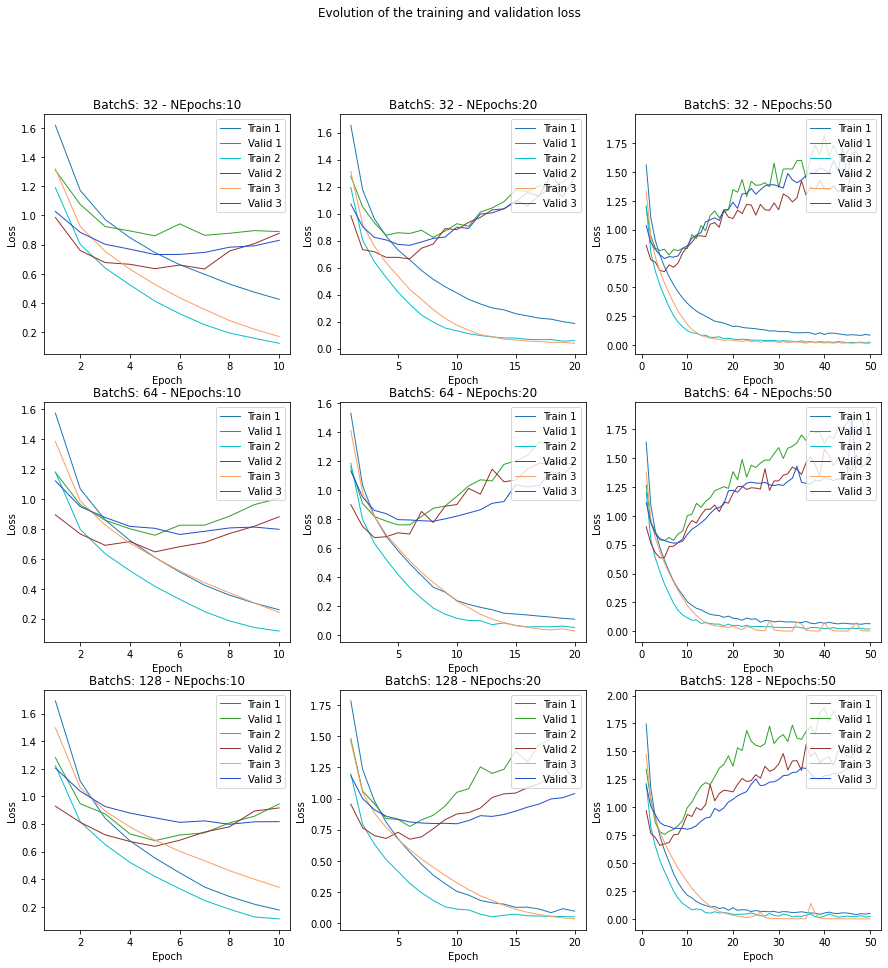

In [ ]:
plot_losses_N(train_history4, val_history4)

### Best Results for architecture 4

In [ ]:
ne, bs, lr = best_results4[0]
tr_acc, val_acc, te_acc = best_results4[3]

print('Best params: {} epochs, batch size = {}, learning rate = {}'.format(ne, bs, lr))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('train', 40000, tr_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('validation', 10000, val_acc))
print('\tAccuracy of the network on the {} {} images: {:.2f} %'.format('test', 10000, te_acc))

Best params: 20 epochs, batch size = 32, learning rate = 0.001
	Accuracy of the network on the train 40000 images: 88.55 %
	Accuracy of the network on the validation 10000 images: 79.56 %
	Accuracy of the network on the test 10000 images: 74.85 %


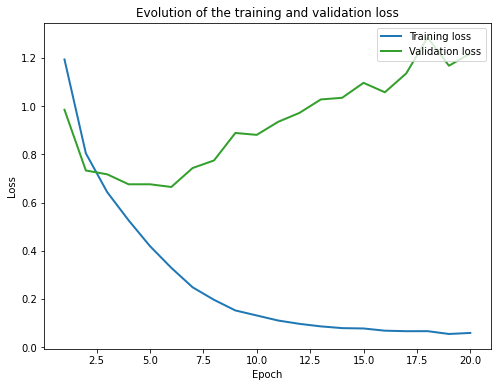

In [ ]:
plot_losses(best_results4[1], best_results4[2])

In [ ]:
confusion_matrix4 = accuracy_per_class(best_net4)

Class      Accuracy (%)
plane        79.20   
car          87.70   
bird         64.80   
cat          61.60   
deer         70.50   
dog          65.70   
frog         71.90   
horse        79.80   
ship         84.40   
truck        82.90   


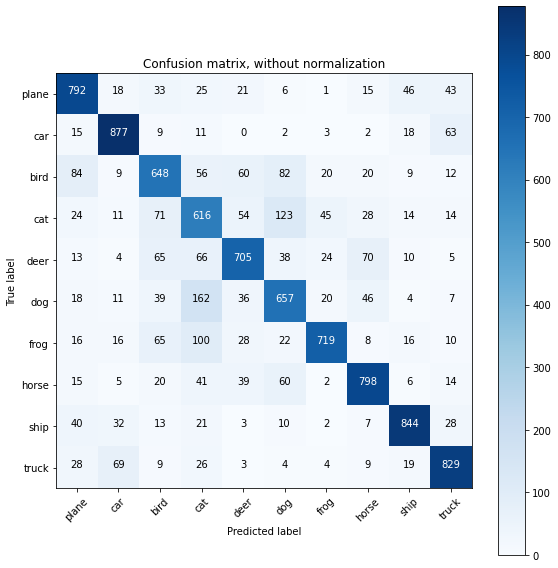

In [ ]:
plot_confusion_matrix(confusion_matrix4, classes,
                      title='Confusion matrix, without normalization')

**Comments on architecture 4**

Like the previous architecture, here we use 4 convolutional blocks, with the modification that a Batch Normalization layers is added after each convolution, with the goal of adding regularization to the architecture.

Contrary to what was expected, the results did not improve. The percentage accuracy of the test is similar to that of the previous architecture. However, an analysis of the loss history during training and validation show that the addition of the Batch Normalization resulted in a quicker convergence of the model.

### Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Stanford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [How backpropagation works](http://michaelnielsen.org/blog/how-the-backpropagation-algorithm-works/) (Michael Nielsen)

If you feel like this was too easy peasy:

-Investigate further [optimization methods](https://pytorch.org/docs/stable/optim.html) beyond SGD, and Adam and their parameters.

-Look at ways to improve your network using regularization techniques

-Look at ways to visualize network activations for model interpretability

-Use transfer learning, in order to use torchvision with pretrained=True with some pretrained models


Acknowledgements: 
This tutorial is based on the [original PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and was adapted by [Antonin Raffin](http://araffin.github.io/) for the ROB313 course at ENSTA Paris. Thanks to Clement Pinard for feedback!


### More documentation/ questions to explore about Google Colab: 

-How to connect your Google Drive with Google Colab?

-How to import a new notebook and save it to your GDrive?

-How to use files which are contained in your GDrive?

Some tips [here](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)




## Extras to read later
### Visualizing Convolution parameters:
[A guide to convolution arithmetic for deep learning](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) 
by Vincent Dumoulin, Francesco Visin 


### Documentation of autograd and Function: 
[Autograd](http://pytorch.org/docs/autograd)
